In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest

In [45]:
df = pd.read_csv('adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [47]:
# Looks like there are no Null values in the dataset.

In [48]:
df.duplicated().sum()

np.int64(24)

In [49]:
# There are 24 duplicated rows which are of no use to us, therefore we need to drop those rows.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [50]:
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [51]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [52]:
df['workclass'].value_counts()

,count
workclass,
Private,22673
Self-emp-not-inc,2540
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [53]:
df['education'].value_counts()

,count
education,
HS-grad,10494
Some-college,7282
Bachelors,5353
Masters,1722
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,645


In [54]:
df['education_num'].value_counts()

,count
education_num,
9,10494
10,7282
13,5353
14,1722
11,1382
7,1175
12,1067
6,933
4,645


In [55]:
df['marital_status'].value_counts()

,count
marital_status,
Married-civ-spouse,14970
Never-married,10667
Divorced,4441
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


In [56]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,4136
Craft-repair,4094
Exec-managerial,4065
Adm-clerical,3768
Sales,3650
Other-service,3291
Machine-op-inspct,2000
?,1843
Transport-moving,1597


In [57]:
df['relationship'].value_counts()

,count
relationship,
Husband,13187
Not-in-family,8292
Own-child,5064
Unmarried,3445
Wife,1568
Other-relative,981


In [58]:
df['race'].value_counts()

,count
race,
White,27795
Black,3122
Asian-Pac-Islander,1038
Amer-Indian-Eskimo,311
Other,271


In [59]:
df['sex'].value_counts()

,count
sex,
Male,21775
Female,10762


In [60]:
df['native_country'].value_counts()

,count
native_country,
United-States,29153
Mexico,639
?,582
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [61]:
df['income'].value_counts()

,count
income,
<=50K,24698
>50K,7839


In [62]:
le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['education_num'] = le.fit_transform(df['education_num'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['native_country'] = le.fit_transform(df['native_country'])
df['sex'] = pd.get_dummies(df['sex'],drop_first = True).astype(int)
df['income'] = pd.get_dummies(df['income'],drop_first=True).astype(int)
df = df.join(pd.get_dummies(df['race'],drop_first = True).astype(int))
df.drop(columns = 'race',inplace=True)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Asian-Pac-Islander,Black,Other,White
0,39,7,77516,9,12,4,1,1,1,2174,0,40,39,0,0,0,0,1
1,50,6,83311,9,12,2,4,0,1,0,0,13,39,0,0,0,0,1
2,38,4,215646,11,8,0,6,1,1,0,0,40,39,0,0,0,0,1
3,53,4,234721,1,6,2,6,0,1,0,0,40,39,0,0,1,0,0
4,28,4,338409,9,12,2,10,5,0,0,0,40,5,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,4,257302,7,11,2,13,5,0,0,0,38,39,0,0,0,0,1
32533,40,4,154374,11,8,2,7,0,1,0,0,40,39,1,0,0,0,1
32534,58,4,151910,11,8,6,1,4,0,0,0,40,39,0,0,0,0,1
32535,22,4,201490,11,8,4,1,3,1,0,0,20,39,0,0,0,0,1


In [63]:
# Lets scale the data set using StandardScaler and MinMaxScaler to bring all the variables in the dataset to same magnitude.

In [64]:
sc = StandardScaler()
df1 = df.copy()
df1[['age','fnlwgt','capital_gain','hours_per_week']]=sc.fit_transform(df1[['age','fnlwgt','capital_gain','hours_per_week']])
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Asian-Pac-Islander,Black,Other,White
0,0.030390,7,-1.063569,9,12,4,1,1,1,0.148292,0,-0.035664,39,0,0,0,0,1
1,0.836973,6,-1.008668,9,12,2,4,0,1,-0.145975,0,-2.222483,39,0,0,0,0,1
2,-0.042936,4,0.245040,11,8,0,6,1,1,-0.145975,0,-0.035664,39,0,0,0,0,1
3,1.056950,4,0.425752,1,6,2,6,0,1,-0.145975,0,-0.035664,39,0,0,1,0,0
4,-0.776193,4,1.408066,9,12,2,10,5,0,-0.145975,0,-0.035664,5,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,4,0.639678,7,11,2,13,5,0,-0.145975,0,-0.197650,39,0,0,0,0,1
32533,0.103716,4,-0.335436,11,8,2,7,0,1,-0.145975,0,-0.035664,39,1,0,0,0,1
32534,1.423579,4,-0.358779,11,8,6,1,4,0,-0.145975,0,-0.035664,39,0,0,0,0,1
32535,-1.216148,4,0.110930,11,8,4,1,3,1,-0.145975,0,-1.655530,39,0,0,0,0,1


In [65]:
ms = MinMaxScaler()
df2 = df.copy()
df2[['age','fnlwgt','capital_gain','hours_per_week']]=ms.fit_transform(df2[['age','fnlwgt','capital_gain','hours_per_week']])
df2

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Asian-Pac-Islander,Black,Other,White
0,0.301370,7,0.044302,9,12,4,1,1,1,0.021740,0,0.397959,39,0,0,0,0,1
1,0.452055,6,0.048238,9,12,2,4,0,1,0.000000,0,0.122449,39,0,0,0,0,1
2,0.287671,4,0.138113,11,8,0,6,1,1,0.000000,0,0.397959,39,0,0,0,0,1
3,0.493151,4,0.151068,1,6,2,6,0,1,0.000000,0,0.397959,39,0,0,1,0,0
4,0.150685,4,0.221488,9,12,2,10,5,0,0.000000,0,0.397959,5,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0.136986,4,0.166404,7,11,2,13,5,0,0.000000,0,0.377551,39,0,0,0,0,1
32533,0.315068,4,0.096500,11,8,2,7,0,1,0.000000,0,0.397959,39,1,0,0,0,1
32534,0.561644,4,0.094827,11,8,6,1,4,0,0.000000,0,0.397959,39,0,0,0,0,1
32535,0.068493,4,0.128499,11,8,4,1,3,1,0.000000,0,0.193878,39,0,0,0,0,1


In [66]:
# Feature Engineering
# 1st Feature generation
df2['education_num_per_age'] = df2['education_num'] / df2['age']
# This feature captures how "quickly" or "early" someone attained their education level relative to their age. For instance:
# A 25-year-old with education_num = 13 likely completed more education in less time than a 45-year-old with the same score.
# This helps model efficiency of education progression, which might correlate with better jobs and higher income.
# 2nd Feature generation
def simplify_marital_status(status):
    if status in ['Married-civ-spouse', 'Married-spouse-absent']:
        return 'Married'
    elif status == 'Never-married':
        return 'Single'
    else:
        return 'Previously-Married'

df2['marital_status_simplified'] = df2['marital_status'].apply(simplify_marital_status)
# The original marital_status column has too many fine-grained categories. Simplifying it can help reduce noise and emphasize key social patterns:
# Married individuals may have dual incomes.
# Singles may have more time for work/training.
# Previously married individuals may face financial stress.

In [67]:
df2

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Asian-Pac-Islander,Black,Other,White,education_num_per_age,marital_status_simplified
0,0.301370,7,0.044302,9,12,4,1,1,1,0.021740,0,0.397959,39,0,0,0,0,1,39.818182,Previously-Married
1,0.452055,6,0.048238,9,12,2,4,0,1,0.000000,0,0.122449,39,0,0,0,0,1,26.545455,Previously-Married
2,0.287671,4,0.138113,11,8,0,6,1,1,0.000000,0,0.397959,39,0,0,0,0,1,27.809524,Previously-Married
3,0.493151,4,0.151068,1,6,2,6,0,1,0.000000,0,0.397959,39,0,0,1,0,0,12.166667,Previously-Married
4,0.150685,4,0.221488,9,12,2,10,5,0,0.000000,0,0.397959,5,0,0,1,0,0,79.636364,Previously-Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0.136986,4,0.166404,7,11,2,13,5,0,0.000000,0,0.377551,39,0,0,0,0,1,80.300000,Previously-Married
32533,0.315068,4,0.096500,11,8,2,7,0,1,0.000000,0,0.397959,39,1,0,0,0,1,25.391304,Previously-Married
32534,0.561644,4,0.094827,11,8,6,1,4,0,0.000000,0,0.397959,39,0,0,0,0,1,14.243902,Previously-Married
32535,0.068493,4,0.128499,11,8,4,1,3,1,0.000000,0,0.193878,39,0,0,0,0,1,116.800000,Previously-Married


In [68]:
#  Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice

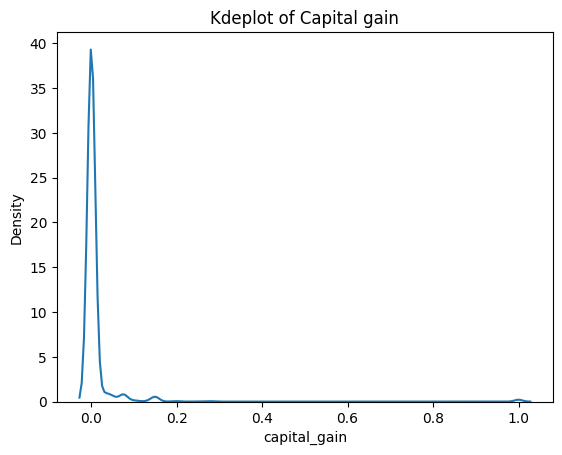

In [69]:
sns.kdeplot(df2['capital_gain'])
plt.title('Kdeplot of Capital gain')
plt.show()

In [70]:
df2['capital_gain'].skew()

np.float64(11.94940283355146)

In [71]:
# As we can 'fnlwgt' column is positively skewed lets apply log transformation to try to make it normal skewed.

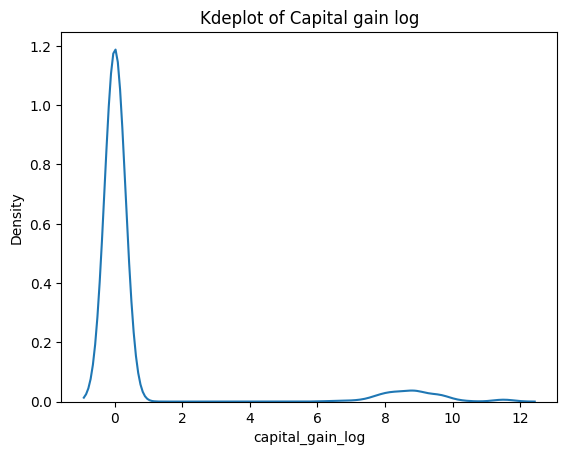

In [72]:
df2['capital_gain_log'] = np.log1p(df['capital_gain'])
sns.kdeplot(df2['capital_gain_log'])
plt.title('Kdeplot of Capital gain log')
plt.show()

In [73]:
df2['capital_gain_log'].skew()

np.float64(3.094666793136126)

In [74]:
# As we can see we have tried to bring the skewness to normal to a great extent.

In [75]:
#  Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

In [76]:
df3 = df2.copy()
df3 = df3.select_dtypes(include=['int64', 'float64'])
If = IsolationForest(contamination='auto')
df3['outlier_prediction'] = If.fit_predict(df3)
df3['outlier_prediction'].value_counts()

,count
outlier_prediction,
1,28543
-1,3994


In [77]:
df_no_outliers = df3[df3['outlier_prediction'] == 1].drop(columns=['outlier_prediction'])
print("Original shape:", df3.shape)
print("After removing outliers:", df_no_outliers.shape)
df_no_outliers

Original shape: (32537, 21)
After removing outliers: (28543, 20)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Asian-Pac-Islander,Black,Other,White,education_num_per_age,capital_gain_log
0,0.301370,7,0.044302,9,12,4,1,1,1,0.02174,0,0.397959,39,0,0,0,0,1,39.818182,7.684784
1,0.452055,6,0.048238,9,12,2,4,0,1,0.00000,0,0.122449,39,0,0,0,0,1,26.545455,0.000000
2,0.287671,4,0.138113,11,8,0,6,1,1,0.00000,0,0.397959,39,0,0,0,0,1,27.809524,0.000000
3,0.493151,4,0.151068,1,6,2,6,0,1,0.00000,0,0.397959,39,0,0,1,0,0,12.166667,0.000000
5,0.273973,4,0.184932,12,13,2,4,5,0,0.00000,0,0.397959,39,0,0,0,0,1,47.450000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,0.068493,4,0.202298,15,9,4,11,1,1,0.00000,0,0.397959,39,0,0,0,0,1,131.400000,0.000000
32532,0.136986,4,0.166404,7,11,2,13,5,0,0.00000,0,0.377551,39,0,0,0,0,1,80.300000,0.000000
32533,0.315068,4,0.096500,11,8,2,7,0,1,0.00000,0,0.397959,39,1,0,0,0,1,25.391304,0.000000
32534,0.561644,4,0.094827,11,8,6,1,4,0,0.00000,0,0.397959,39,0,0,0,0,1,14.243902,0.000000


In [78]:
# Outliers can pull the regression line or decision boundary toward them, leading to poor generalization on unseen data and inflated errors (like higher MSE in regression)
# In clustering algorithms outliers can pull centroids away from true cluster centers. They may form entire small clusters that are not meaningful.

In [79]:
# ppscore is not working due to version mismatch. Hence Lets just discuss about ppscore. ppscore is a score (0 to 1) that measures how well one feature can predict another using a
# machine learning model. It also detects non-linear relationships within variables. It is mainly used for finding which feature best predicts your target. However it is slower than
# correlation and can overfit on small imbalanced datasets.

<Axes: >

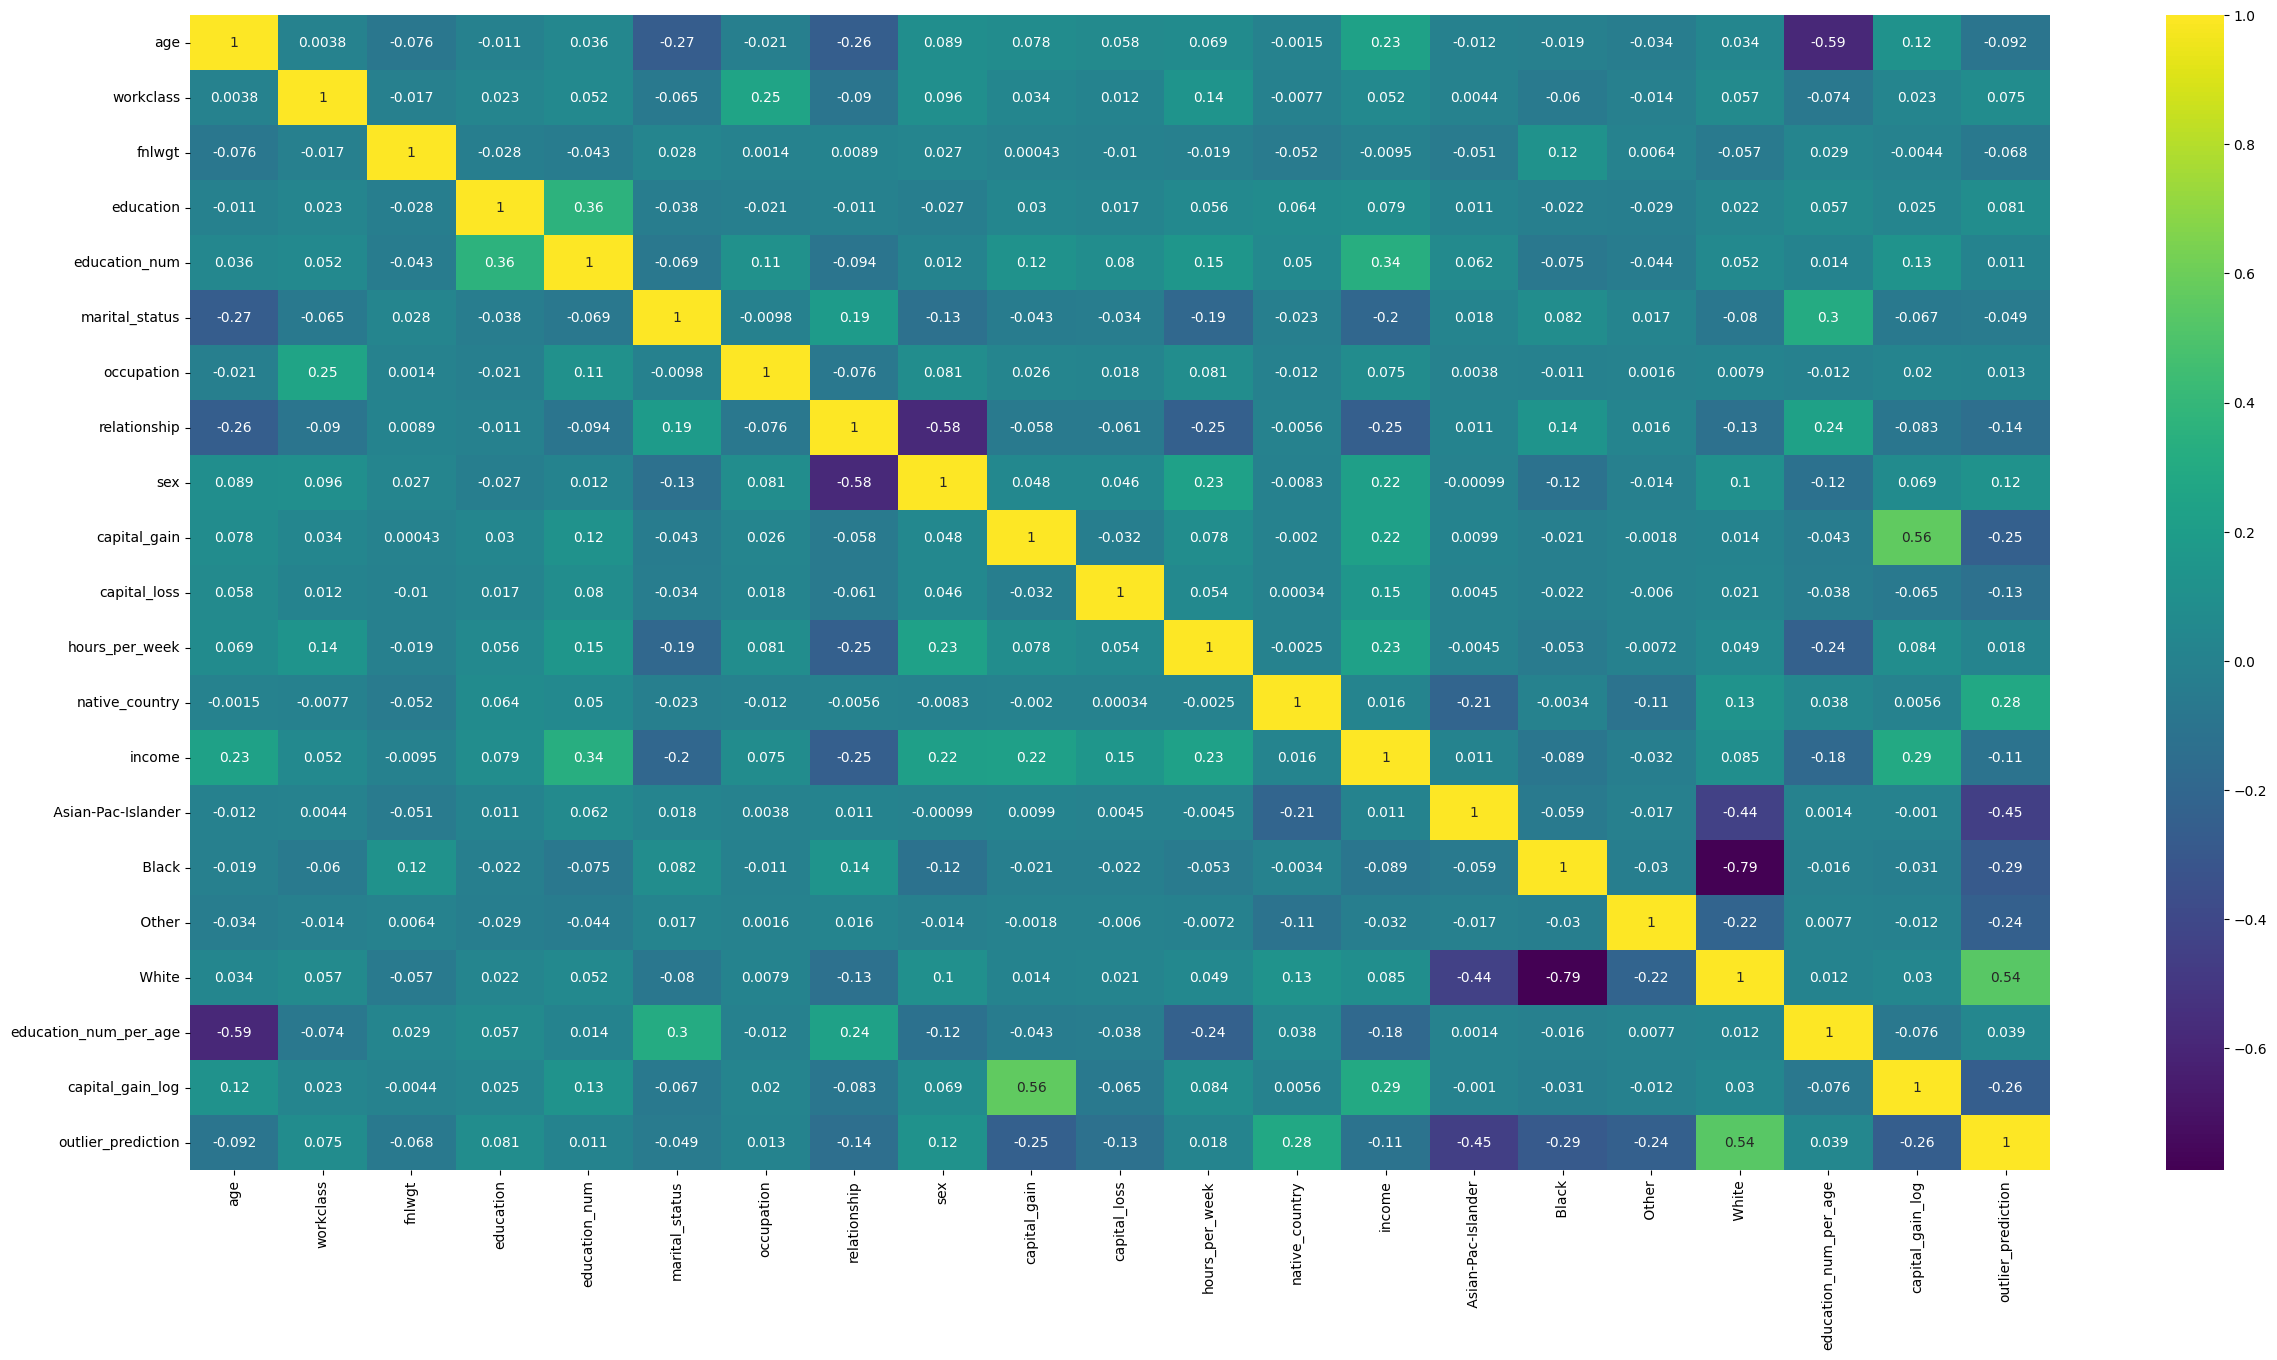

In [82]:
figure = plt.figure(figsize=(30,15))
sns.heatmap(df3.corr(),annot=True,cmap='viridis')
plt.show()

In [ ]:
Comparison of Predictive Power Score(PPS) and Correlation Matrix
PPS is better for predictive feature selection whereas Correlation is better for understanding simple, linear relationships. We use ppscore when we want to know which features are
useful for predicting your target whereas to understand linear relationship between variables we use Correlation matrix.